In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use("ggplot")

In [2]:
# Input : 2 types 
# (i) gene_data 
# (ii) meta_data
gene_data = pd.read_csv('Assignment-DS_gene_data.csv')
meta_data = pd.read_csv('Assignment-DS_Meta_data_sheet_.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Samples takes at sample time instant according to meta_data
samples_at_same_time = np.reshape(np.array(meta_data['sIdx']), (10, 3))
samples_at_same_time

array([['S1', 'S2', 'S3'],
       ['S4', 'S5', 'S6'],
       ['S7', 'S8', 'S9'],
       ['S10', 'S11', 'S12'],
       ['S13', 'S14', 'S15'],
       ['S16', 'S17', 'S18'],
       ['S19', 'S20', 'S21'],
       ['S22', 'S23', 'S24'],
       ['S25', 'S26', 'S27'],
       ['S28', 'S29', 'S30']], dtype=object)

#### Error Handling

In [4]:
# This step is basically to set all columns as numeric as some might have object data type
sIds = meta_data['sIdx'].tolist()
for sId in sIds:
    gene_data[sId] = pd.to_numeric(gene_data[sId], errors='coerce')

In [5]:
# Error handling
def clean_data(df, sets):
    for s in sets:
        # Remove the row if at one time point there is no value in any sample
        df = df.drop(df[df[s[0]].isnull() & df[s[1]].isnull() & df[s[2]].isnull()].index)
        
        # Replace with the only value is 2/3 is missing
        df.loc[df[s[0]].notnull() & df[s[1]].isnull() & df[s[2]].isnull(), s[1]] = df[s[0]]
        df.loc[df[s[1]].notnull() & df[s[0]].isnull() & df[s[2]].isnull(), s[0]] = df[s[1]]
        df.loc[df[s[2]].notnull() & df[s[0]].isnull() & df[s[1]].isnull(), s[0]] = df[s[2]]
        
        # Replace with mean if 1/3 is missing
        df.loc[df[s[0]].isnull() & df[s[1]].notnull() & df[s[2]].notnull(), s[0]] = (df[s[1]] + df[s[2]])/2
        df.loc[df[s[1]].isnull() & df[s[0]].notnull() & df[s[2]].notnull(), s[1]] = (df[s[0]] + df[s[2]])/2
        df.loc[df[s[2]].isnull() & df[s[1]].notnull() & df[s[0]].notnull(), s[2]] = (df[s[1]] + df[s[0]])/2

    return df    

In [6]:
# Get clean gene data from gene data
clean_gene_data = clean_data(gene_data, samples_at_same_time)
# Check if any NaN values still exist
clean_gene_data.isnull().values.any()

False

#### Get PCA Plot

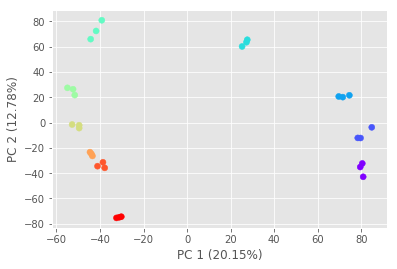

In [7]:
sample_vs_exp_data = clean_gene_data[sIds].T
scaler = StandardScaler()
sample_vs_exp_data = pd.DataFrame(scaler.fit_transform(sample_vs_exp_data))

# Color coding
labels = sIds
colors = cm.rainbow(np.linspace(0, 1, 10))
color_vec = [colors[indx / 3] for indx, label in enumerate(labels)]

# Apply PCA
pca = PCA(n_components = 2)
pca.fit(sample_vs_exp_data)
df_pca = pd.DataFrame(pca.transform(sample_vs_exp_data), columns=['PC1', 'PC2'], index=sample_vs_exp_data.index)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c = color_vec)

# Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 

plt.show()